In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne

## Reading data...

In [2]:
data = mne.io.read_raw_eeglab('./N400_data/1/1_N400.set')

Reading /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/1/1_N400.fdt


In [3]:
type(data)

mne.io.eeglab.eeglab.RawEEGLAB

In [4]:
data

<RawEEGLAB | 1_N400.fdt, 33 x 585728 (572.0 s), ~50 kB, data not loaded>

Using matplotlib as 2D backend.


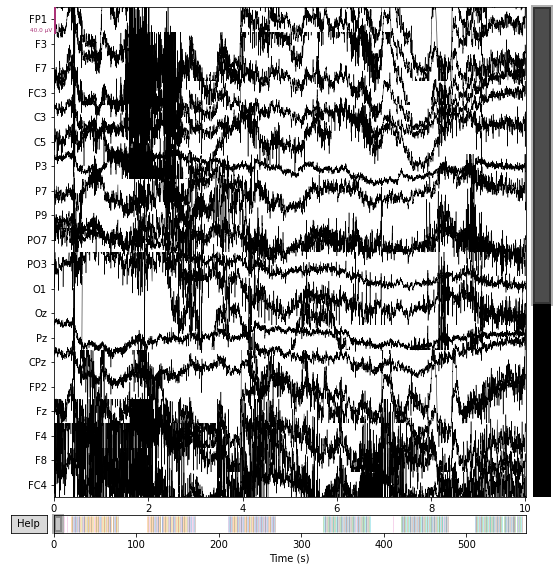

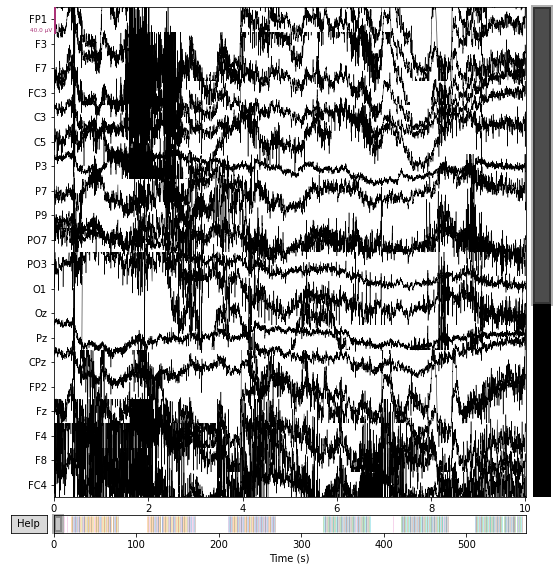

In [5]:
data.plot()

In [6]:
data.describe()

<RawEEGLAB | 1_N400.fdt, 33 x 585728 (572.0 s), ~50 kB, data not loaded>
ch  name        type  unit        min         Q1     median         Q3        max
 0  FP1         EEG   µV     -3440.63   -3165.76   -3000.89   -1904.67   17093.70
 1  F3          EEG   µV     -2106.86   -1699.64   -1350.08    -993.55    -539.89
 2  F7          EEG   µV      7911.38    8550.12    8961.22    9224.09   11740.96
 3  FC3         EEG   µV        43.61     393.23     622.17     827.95    1119.29
 4  C3          EEG   µV       744.83    1072.26    1386.76    1610.61    2020.07
 5  C5          EEG   µV      1245.04    2235.39    3445.38    3644.48    4299.57
 6  P3          EEG   µV     -2103.98   -1828.95   -1575.61   -1398.17    -933.67
 7  P7          EEG   µV     -2429.92   -2202.61   -2028.54   -1812.48   -1406.08
 8  P9          EEG   µV      -168.36      48.61     165.77     373.70    1031.58
 9  PO7         EEG   µV     -6134.69   -5493.73   -5295.88   -4916.79   -4291.45
10  PO3         EEG   µV 

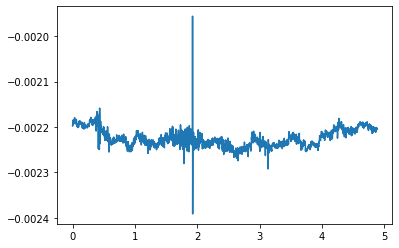

In [112]:
%matplotlib inline
n_dp= 5000
plt.plot(data['Cz'][1][:n_dp], data['Cz'][0][0][:n_dp])

We'll need this in a nice format to test our classifiers. Ideally, it should be cut up according to the event timings and labelled. Here, I'll make a dataset for us to practice on.

In [8]:
cut_data = mne.io.read_epochs_eeglab('./N400_data/1/1_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')

Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/1/1_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
110 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/2096003608.py:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/1/1_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


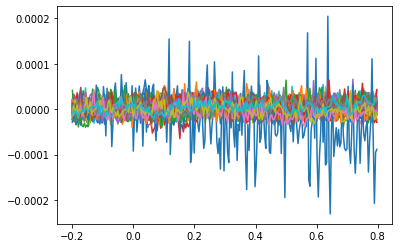

In [19]:
counter = 0
for ep in cut_data:
    plt.plot(cut_data[0].times, ep[21])
    counter += 1

In [76]:
counter

110

In [79]:
cut_data

<EpochsEEGLAB |  110 events (all good), -0.199219 - 0.796875 sec, baseline off, ~7.6 MB, data loaded,
 'B2(212)/201': 25
 'B1(222)/201': 23
 'B2(212)': 3
 'B1(222)': 6
 'B1(221)/201': 16
 'B2(211)/201': 23
 'B1(221)': 8
 'B2(211)': 6>

In [121]:
cut_data.event_id

{'B2(211)/201': 1,
 'B1(221)': 2,
 'B1(221)/201': 3,
 'B2(211)': 4,
 'B2(212)/201': 5,
 'B1(222)': 6,
 'B1(222)/201': 7,
 'B2(212)': 8}

In [73]:
list(cut_data[1].event_id.keys())[0]

'B1(222)/201'

In [83]:
df['epoch'].max()

109

In [92]:
df[df['epoch'] == 0]['condition'][0]

'B2(212)/201'

In [85]:
df = cut_data.to_data_frame()
df[df['epoch'] == 0]['Cz'].to_numpy()

array([ 11.62012482,   3.94488883,  -0.0654624 ,  -4.39324236,
       -12.26225471, -10.99770164, -13.29763794, -17.96395111,
       -16.58966637, -15.24082375, -17.84520721, -22.41509628,
       -14.83846092,  -5.76584673,  -2.83464265,   0.14421529,
         1.15053058,   3.15743136,   8.38248253,  11.70093536,
        13.13929939,  11.50405216,  14.09445667,   9.92620468,
         5.81001902,   1.13786483,  -1.1874373 ,  -7.64090204,
       -18.75258255, -18.9878273 , -18.02996445, -17.30612946,
       -15.00004768,  -5.943501  ,   1.48367381,   5.43268538,
         3.93095088,   5.58134127,   7.85360479,  13.27294159,
        17.01265907,  17.1717186 ,  15.07142258,  15.4747982 ,
        16.51272392,  19.55114746,  15.14761925,  12.55722713,
         5.13801908,  -2.73960137,  -6.80705118,  -8.86627197,
       -10.7391758 ,  -8.53596687,  -7.0097928 ,  -5.68883371,
        -1.07455945,   0.31459969,   8.01053333,  10.88024616,
        12.45140934,  16.49908829,  17.36153221,  24.58

In [122]:
N400_codes = ['B1(221)/201', 'B1(222)/201', 'B1(222)', 'B1(221)']
no_N400_codes = ['B2(211)/201', 'B2(212)/201', 'B2(212)', 'B2(211)']
X_hit = []
X_miss = []

for subject in range(1, 41):
    cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')
    df = cut_data.to_data_frame()
    for i in range(df['epoch'].max()):
        if df[df['epoch'] == i]['condition'].iloc[0] in no_N400_codes:
            X_miss.append(df[df['epoch'] == i]['Cz'].to_numpy())
        else:
            X_hit.append(df[df['epoch'] == i]['Cz'].to_numpy())
    
                


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/1/1_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
110 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/2/2_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/3/3_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/4/4_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/5/5_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/6/6_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/7/7_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/8/8_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/9/9_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/10/10_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/11/11_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
114 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/12/12_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/13/13_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
112 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/14/14_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
110 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/15/15_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
107 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/16/16_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/17/17_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
114 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/18/18_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
114 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/19/19_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/20/20_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
109 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/21/21_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/22/22_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
112 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/23/23_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/24/24_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/25/25_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
110 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/26/26_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/27/27_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/28/28_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
112 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/29/29_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/30/30_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/31/31_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/32/32_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
109 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/33/33_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/34/34_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/35/35_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/36/36_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
112 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/37/37_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/38/38_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
114 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/39/39_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


Extracting parameters from /home/kusha/Code/NeuroTech/Neurotech 2023/N400_data/40/40_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set...
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_4828/4009464892.py:7: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  cut_data = mne.io.read_epochs_eeglab('./N400_data/'+ str(subject) + '/'+ str(subject) + '_N400_shifted_ds_reref_ucbip_hpfilt_ica_corr_cbip_elist_bins_epoch.set')


In [123]:
X_hit = np.array(X_hit)
X_miss = np.array(X_miss)

print(X_hit.shape)
print(X_miss.shape)

(2231, 256)
(2226, 256)


In [124]:
dataset_size = min(X_hit.shape[0], X_miss.shape[0])
np.random.shuffle(X_hit)
np.random.shuffle(X_miss)
X_hit = X_hit[:dataset_size]
X_miss = X_miss[:dataset_size]

In [125]:
X = np.concatenate((X_hit, X_miss))
y = np.concatenate((np.ones(dataset_size), np.zeros(dataset_size)))

print(X.shape)
print(y.shape)

(4452, 256)
(4452,)


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [127]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3561, 256) (891, 256) (3561,) (891,)


In [128]:
np.save("Cz_dataset/X_train.npy", X_train)
np.save("Cz_dataset/X_test.npy", X_test)
np.save("Cz_dataset/y_train.npy", y_train)
np.save("Cz_dataset/y_test.npy", y_test)

### I need to check the event codes...